**Autor:** [Boris Timko](mailto:5346398@upjs.sk)

**Podporné materiály k bakalárskej práci <i>VLASTNOSTI A VYUŽITIE STOCHASTICKEJ
DOMINANCIE</i>**

***

<br>

**<font size=10 color=brown> Stochasticka dominancia pomocu distribučných a kvantilových funkcií </font>**

<br>
---
V tom to Jupyter notebooku sa venujeme testovaniu FSD a SSD pomocu distrubučných funkcií a pomocou kvantilových funkcií:

-  ukážeme si niektoré typy distribučných funkcií a kvantilových funkcií náhodných premenných $X$
- zistime FSD a SSD na príkladoch pomocou distribučných funkcii a kvantilových funkcii
- umožníme si meniť parametre a okamžite vidieť dopad na grafy.

In [41]:
# načítanie balíkov
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, binom, poisson, uniform, lognorm

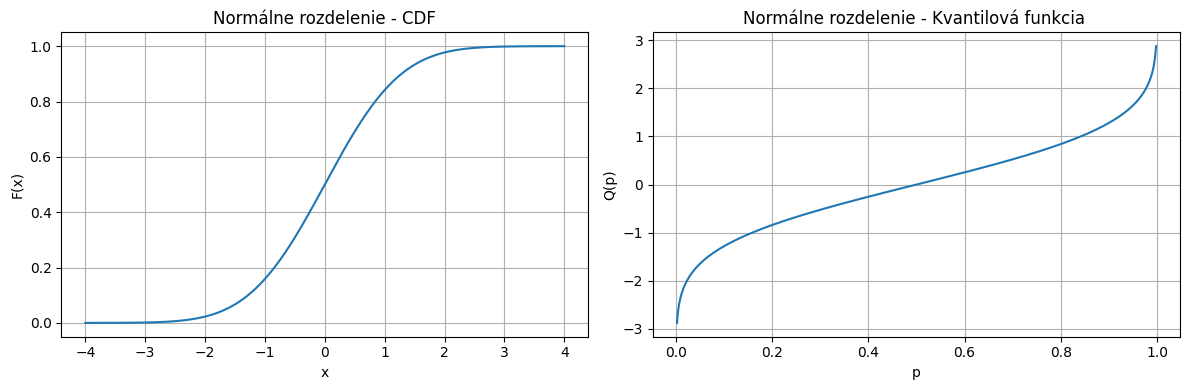

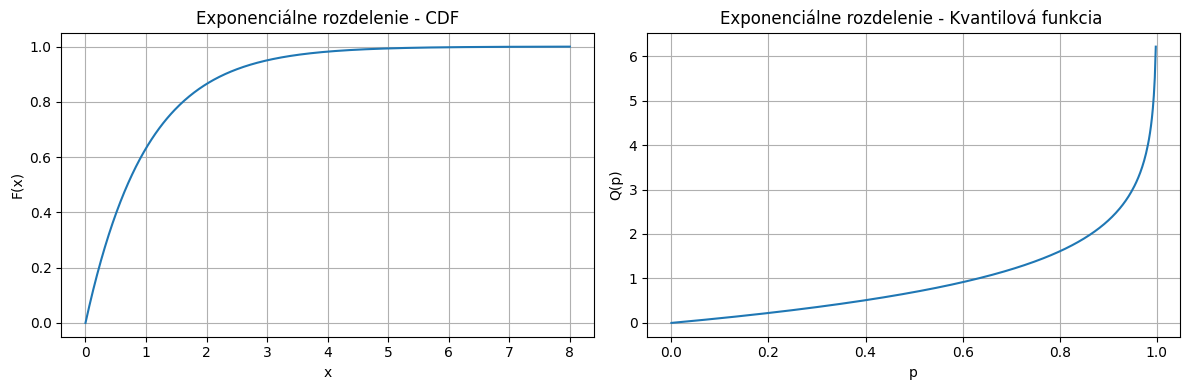

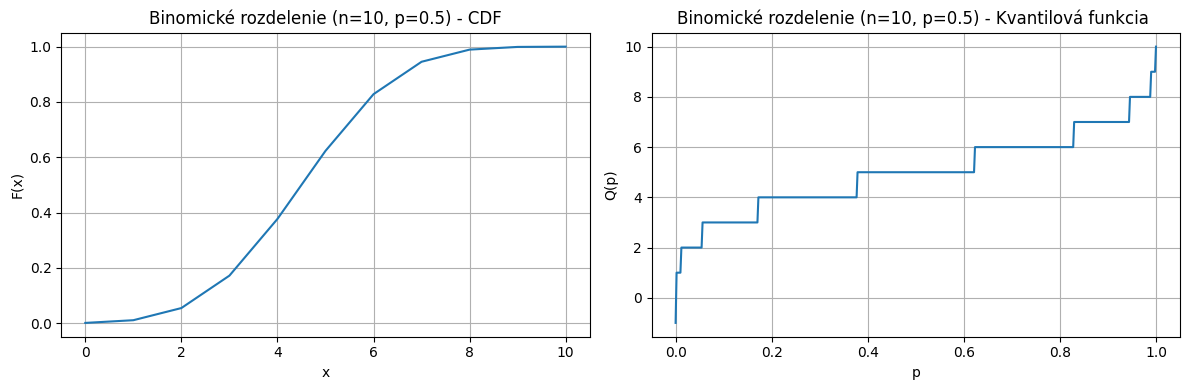

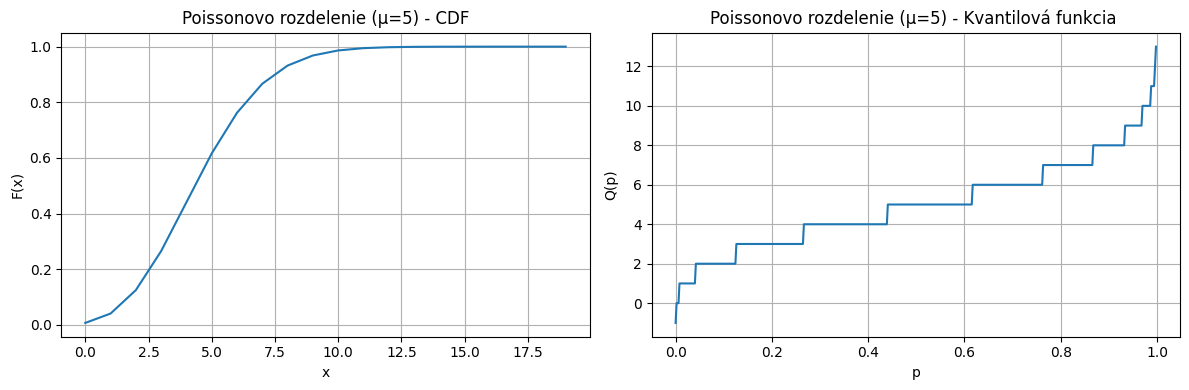

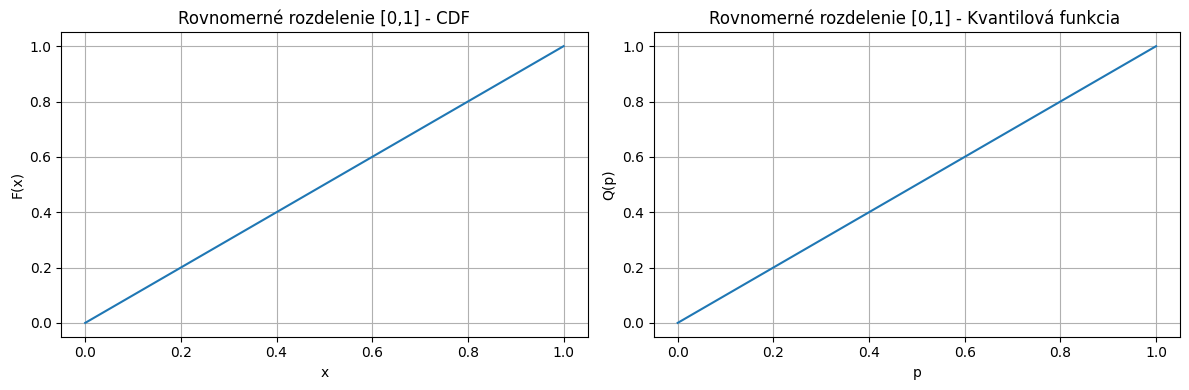

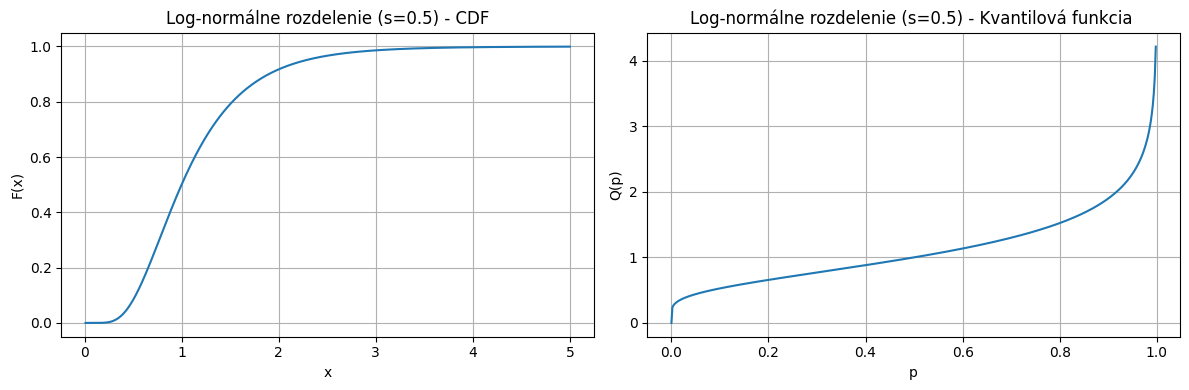

In [40]:
# Nastavenie rozsahov pre kreslenie
x_norm = np.linspace(-4, 4, 500)
x_expon = np.linspace(0, 8, 500)
x_binom = np.arange(0, 11)
x_poisson = np.arange(0, 20)
x_uniform = np.linspace(0, 1, 500)
x_lognorm = np.linspace(0.01, 5, 500)

p = np.linspace(0, 1, 500)

# Funkcia na kreslenie CDF a kvantilovej funkcie
def plot_distribution_cdf_ppf(dist, x, p, title):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # CDF
    axs[0].plot(x, dist.cdf(x))
    axs[0].set_title(f'{title} - CDF')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('F(x)')
    axs[0].grid(True)

    axs[1].plot(p, dist.ppf(p))
    axs[1].set_title(f'{title} - Kvantilová funkcia ')
    axs[1].set_xlabel('p')
    axs[1].set_ylabel('Q(p)')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Normálne rozdelenie
plot_distribution_cdf_ppf(norm(loc=0, scale=1), x_norm, p, 'Normálne rozdelenie')

# Exponenciálne rozdelenie
plot_distribution_cdf_ppf(expon(scale=1), x_expon, p, 'Exponenciálne rozdelenie')

# Binomické rozdelenie (n=10, p=0.5)
plot_distribution_cdf_ppf(binom(n=10, p=0.5), x_binom, p, 'Binomické rozdelenie (n=10, p=0.5)')

# Poissonovo rozdelenie (μ=5)
plot_distribution_cdf_ppf(poisson(mu=5), x_poisson, p, 'Poissonovo rozdelenie (μ=5)')

# Rovnomerné rozdelenie na [0,1]
plot_distribution_cdf_ppf(uniform(loc=0, scale=1), x_uniform, p, 'Rovnomerné rozdelenie [0,1]')

# Log-normálne rozdelenie (s=0.5)
plot_distribution_cdf_ppf(lognorm(s=0.5, scale=np.exp(0)), x_lognorm, p, 'Log-normálne rozdelenie (s=0.5)')


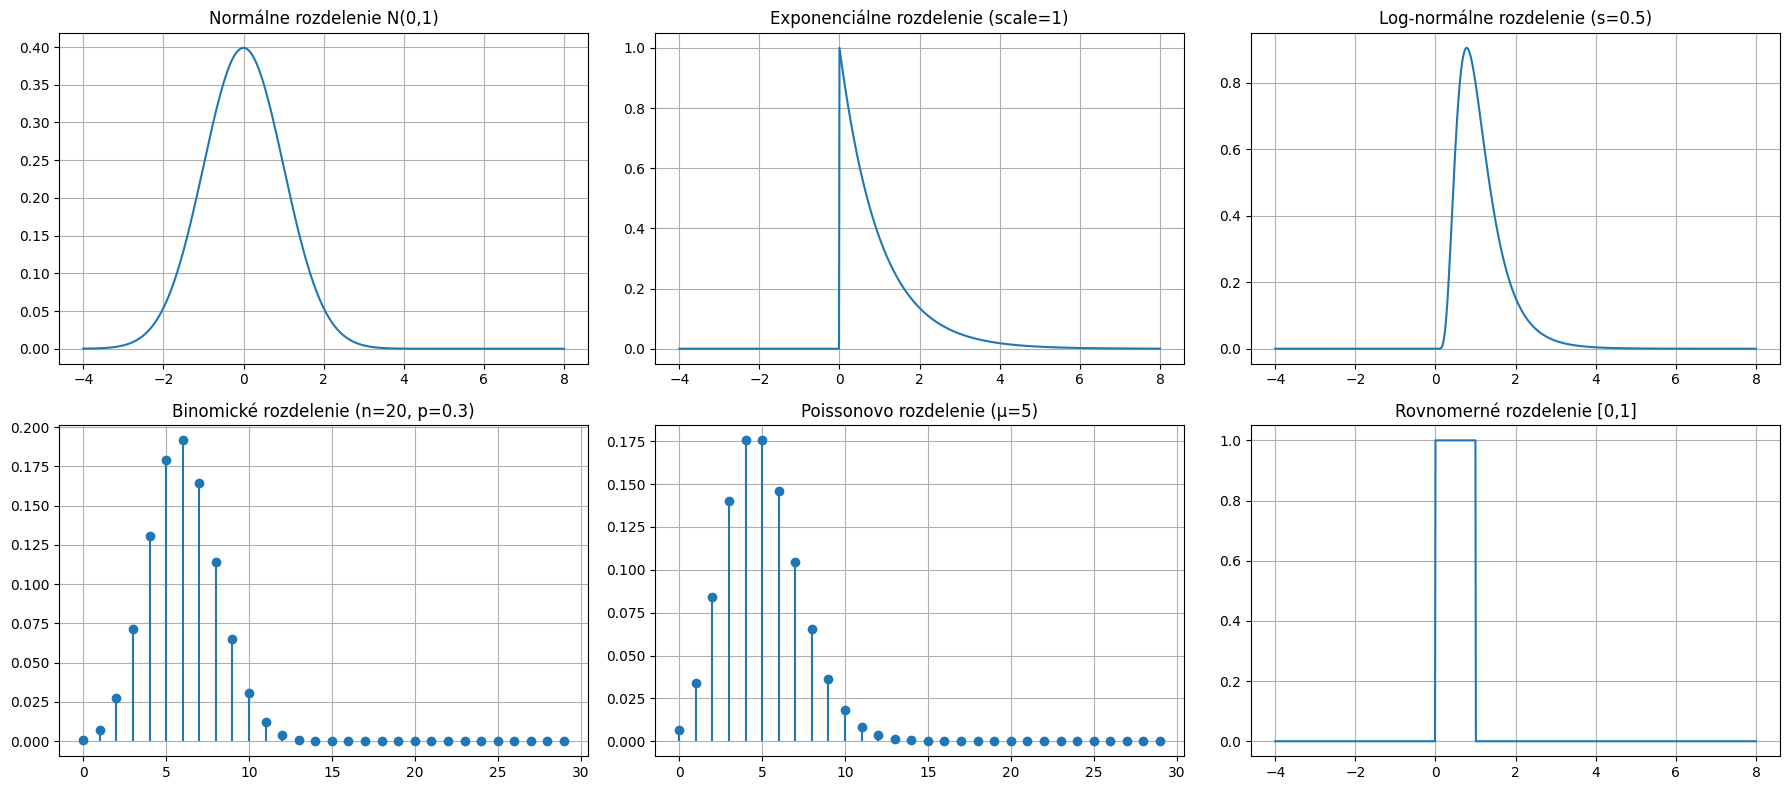

In [42]:
# Vytvorenie rozsahov
x = np.linspace(-4, 8, 1000)
x_discrete = np.arange(0, 30)

# Hustoty pravdepodobnosti
pdf_norm = norm.pdf(x)
pdf_expon = expon.pdf(x, loc=0, scale=1)
pdf_lognorm = lognorm.pdf(x, s=0.5, loc=0, scale=1)
pdf_uniform = uniform.pdf(x, loc=0, scale=1)
pmf_binom = binom.pmf(x_discrete, n=20, p=0.3)
pmf_poisson = poisson.pmf(x_discrete, mu=5)

# Vykreslenie
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

# Normálne
axs[0, 0].plot(x, pdf_norm)
axs[0, 0].set_title("Normálne rozdelenie N(0,1)")

# Exponenciálne
axs[0, 1].plot(x, pdf_expon)
axs[0, 1].set_title("Exponenciálne rozdelenie (scale=1)")

# Log-normálne
axs[0, 2].plot(x, pdf_lognorm)
axs[0, 2].set_title("Log-normálne rozdelenie (s=0.5)")

# Binomické
axs[1, 0].stem(x_discrete, pmf_binom, basefmt=" ")
axs[1, 0].set_title("Binomické rozdelenie (n=20, p=0.3)")

# Poissonovo
axs[1, 1].stem(x_discrete, pmf_poisson, basefmt=" ")
axs[1, 1].set_title("Poissonovo rozdelenie (μ=5)")

# Rovnomerné
axs[1, 2].plot(x, pdf_uniform)
axs[1, 2].set_title("Rovnomerné rozdelenie [0,1]")

for ax in axs.flat:
    ax.grid(True)

plt.tight_layout()
plt.show()

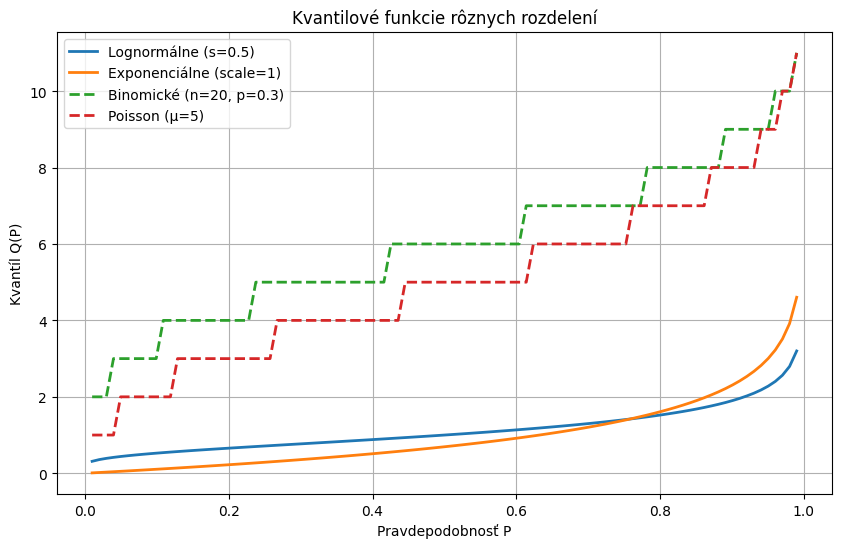

In [43]:
# Úrovne pravdepodobnosti pre spojité rozdelenia
pravd_spojite = np.linspace(0.01, 0.99, 100)

# Kvantily pre spojité rozdelenia
tvar = 0.5  # parameter pre log-normálne rozdelenie (shape)
kvantily_lognorm = lognorm.ppf(pravd_spojite, tvar, loc=0, scale=1)
kvantily_expon = expon.ppf(pravd_spojite, loc=0, scale=1)

# Úrovne pravdepodobnosti pre diskrétne rozdelenia
pravd_bin = np.linspace(0.01, 0.99, 100)
pravd_poiss = np.linspace(0.01, 0.99, 100)

# Kvantily pre diskrétne rozdelenia
kvantily_binom = binom.ppf(pravd_bin, n=20, p=0.3)
kvantily_poisson = poisson.ppf(pravd_poiss, mu=5)

# Vykreslenie
plt.figure(figsize=(10, 6))
plt.plot(pravd_spojite, kvantily_lognorm, label='Lognormálne (s=0.5)', lw=2)
plt.plot(pravd_spojite, kvantily_expon, label='Exponenciálne (scale=1)', lw=2)
plt.plot(pravd_bin, kvantily_binom, label='Binomické (n=20, p=0.3)', lw=2, linestyle='--')
plt.plot(pravd_poiss, kvantily_poisson, label='Poisson (μ=5)', lw=2, linestyle='--')

plt.title('Kvantilové funkcie rôznych rozdelení')
plt.xlabel('Pravdepodobnosť P')
plt.ylabel('Kvantíl Q(P)')
plt.legend()
plt.grid(True)
plt.show()





### V tomto príklade porovnávame dve rozdelenia:

- **$X$** – lognormálne rozdelenie s parametrom $\sigma=0.5$ (žltá krivka),  
- **$Y$** – exponenciálne rozdelenie s parametrom $\text{scale}=1$ (červená krivka).

---

### 1. Hustota pravdepodobnosti (PDF)

- Exponenciálne rozdelenie začína na najvyššej hodnote pri $x=0$ a potom exponenciálne klesá.
- Lognormálne rozdelenie má nulovú hustotu pri $x=0$, strmý nástup pri $x>0$ a skôr doznieva v stredných hodnotách.

### 2. Kumulatívna distribučná funkcia (CDF)

- Krivky CDF sa **pretínajú** pri približne $x \approx 1.43$.  
- Preto **neplatí** $\;F_X(x)\le F_Y(x)\;\forall x$, čiže **žiadna FSD dominancia** (first-order SD).

### 3. Kvantilové funkcie

- Aj kvantilové funkcie $Q_X(P)$ a $Q_Y(P)$ sa pretínajú, takže neplatí $Q_X(P)\ge Q_Y(P)$ pre všetky $P$.  
- Potvrdzuje sa teda absencia FSD v kvantilovej forme.

### 4. Stochastická dominanncia druheho rádu (SSD)

- Vykreslili sme  integrály kvantilových funkcií  
  $
    I_X(P)=\int_0^P Q_X(t)\,dt,\quad
    I_Y(P)=\int_0^P Q_Y(t)\,dt.
  $
- Graficky aj numericky vidíme, že  
  $\;I_Y(P)\ge I_X(P)\;\forall P$,  
  a konečný rozdiel $\int_0^1[Q_Y-Q_X]\ge0$.  
- Teda **exponenciálne rozdelenie SSD-dominuje lognormálne** (second-order SD).

---

**Zhrnutie:**
FSD a SSD može testovať pomocou distručných funkcií alebo kvantilových funkcií
1. **FSD** (prvostupňová dominancia): neplatí (CDF sa pretína).  
2. **SSD** (druhý stupeň dominancie): platí $Y\succeq_2 X$, čiže exponenciálne rozdelenie je lepšie v druhostupňovom zmysle.


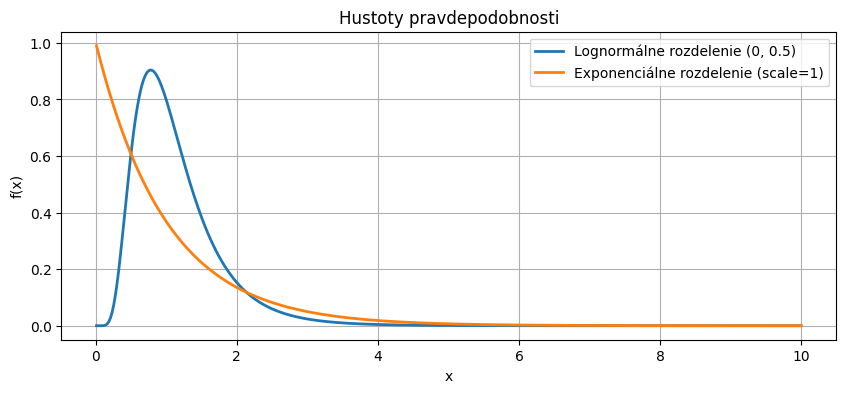

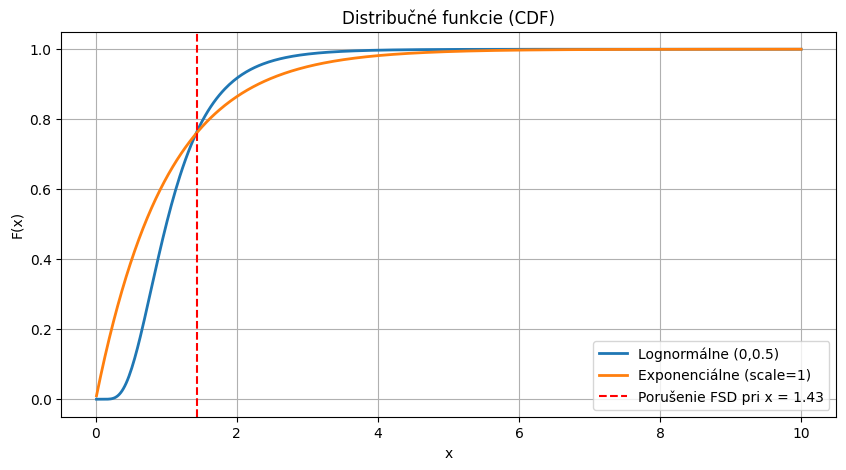

 Žiadna FSD dominancia – prvé porušenie pri x = 1.43


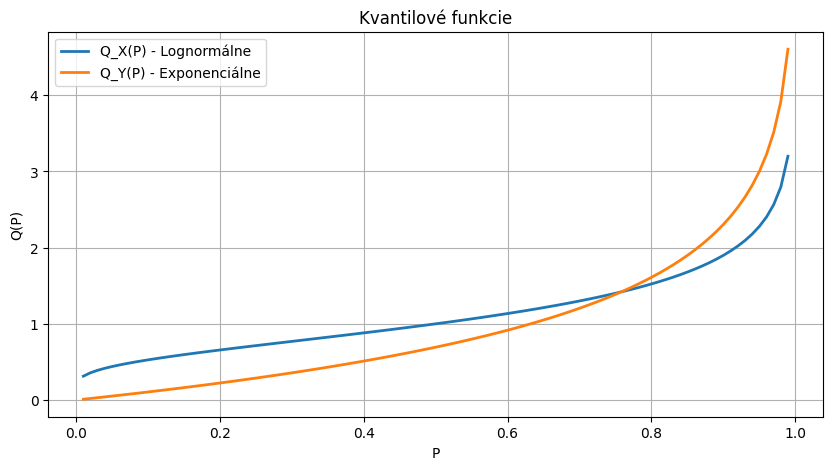

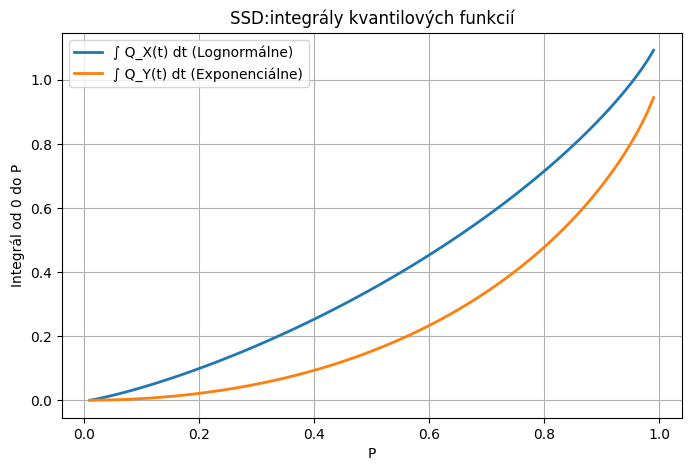

 Exponenciálne rozdelenie SSD-dominuje lognormálne.


In [45]:
# ----------------------------
# Parametre rozdelení
# ----------------------------
s = 0.5             # parameter lognormálneho rozdelenia
scale_y = 1.0       # parameter exponenciálneho rozdelenia (

# Mreže
x = np.linspace(0.01, 10, 500)       # pre PDF a CDF
P = np.linspace(0.01, 0.99, 100)     # pre kvantilové funkcie

# ----------------------------
# PDF (hustota pravdepodobnosti)
# ----------------------------
pdf_X = lognorm.pdf(x, s, loc=0, scale=1)
pdf_Y = expon.pdf(x, loc=0, scale=scale_y)

plt.figure(figsize=(10, 4))
plt.plot(x, pdf_X, label='Lognormálne rozdelenie (0, 0.5)', lw=2)
plt.plot(x, pdf_Y, label='Exponenciálne rozdelenie (scale=1)', lw=2)
plt.title('Hustoty pravdepodobnosti')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# CDF ( distribučná funkcia)
# ----------------------------
F_X = lognorm.cdf(x, s, loc=0, scale=1)
F_Y = expon.cdf(x, loc=0, scale=scale_y)

plt.figure(figsize=(10, 5))
plt.plot(x, F_X, label='Lognormálne (0,0.5)', lw=2)
plt.plot(x, F_Y, label='Exponenciálne (scale=1)', lw=2)
plt.title('Distribučné funkcie (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)

# --- Zistenie bodu porušenia FSD ---
diff_cdf = F_X - F_Y
violation_indices = np.where(diff_cdf > 1e-8)[0]

if len(violation_indices) > 0:
    first_violation_x = x[violation_indices[0]]
    plt.axvline(first_violation_x, color='red', linestyle='--', label=f'Porušenie FSD pri x = {first_violation_x:.2f}')
    plt.legend()
    plt.show()
    print(f" Žiadna FSD dominancia – prvé porušenie pri x = {first_violation_x:.2f}")
else:
    plt.show()
    print(" FSD podmienka je splnená pre všetky x.")

# ----------------------------
# Kvantilové funkcie
# ----------------------------
Q_X = lognorm.ppf(P, s, loc=0, scale=1)
Q_Y = expon.ppf(P, loc=0, scale=scale_y)

plt.figure(figsize=(10, 5))
plt.plot(P, Q_X, label='Q_X(P) - Lognormálne', lw=2)
plt.plot(P, Q_Y, label='Q_Y(P) - Exponenciálne', lw=2)
plt.title('Kvantilové funkcie')
plt.xlabel('P')
plt.ylabel('Q(P)')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# SSD graf:  integrály kvantilových funkcií
# ----------------------------
int_X = np.array([np.trapezoid(Q_X[:i+1], P[:i+1]) for i in range(len(P))])
int_Y = np.array([np.trapezoid(Q_Y[:i+1], P[:i+1]) for i in range(len(P))])

plt.figure(figsize=(8, 5))
plt.plot(P, int_X, label='∫ Q_X(t) dt (Lognormálne)', lw=2)
plt.plot(P, int_Y, label='∫ Q_Y(t) dt (Exponenciálne)', lw=2)
plt.title('SSD:integrály kvantilových funkcií')
plt.xlabel('P')
plt.ylabel('Integrál od 0 do P')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
#  VYHODNOTENIE SSD
# ----------------------------
diff_integrals = int_X - int_Y

if np.all(diff_integrals <= 1e-8):
    print(" Lognormálne rozdelenie SSD-dominuje exponenciálne.")
elif np.all(diff_integrals >= -1e-8):
    print(" Exponenciálne rozdelenie SSD-dominuje lognormálne.")
else:
    print(" Žiadna SSD dominancia medzi rozdeleniami.")


## Porovnavanie Binomického rozdelenie a Poissonoveho rozdelenia.  

V porovnaní dvох diskrétnych rozdelení  
$\mathrm{Bin}(n=20,p=0.3)$ a $\mathrm{Pois}(\mu=5)$ sme vykreslili:

1. **Hustoty pravdepodobností**  
   - Binomické rozdelenie (modré kolieska) má najväčšiu hmotu okolo 6,  
     Poisson (oranžové štvorčeky) okolo 5.  
   - Vidíme, že Poissonovo rozdelenie je o čosi „koncentrovanejšie“ okolo strednej hodnoty.

2. **CDF (kumulatívna distribučná funkcia)**  
   - Obidve CDF sa pretínajú a prvé prísne porušenie  
     $\;F_{\rm bin}(x)\le F_{\rm poi}(x)$\; nastáva pri **$x=11$** (červená prerušovaná čiara).  
   - To znamená **žiadna FSD dominancia** ani v smere Binom > Pois, ani Pois > Binom.

3. **Kvantilové funkcie**  
   - Vypočítali sme kvantily práve pre hodnoty $P$
   - Krivky sa tiež pretínajú
   - Preto **ani v kvantilovej podobe neplatí** $Q_{\rm bin}(P)\ge Q_{\rm poi}(P)$ ∀ $P$ (a ani naopak).

4. **SSD **  
   - Nakoniec sme vykreslili **integrály** kvantilových funkcií  
     $
       I_{\rm bin}(P)=\int_0^P Q_{\rm bin}(t)\,dt,
       \quad
       I_{\rm poi}(P)=\int_0^P Q_{\rm poi}(t)\,dt.
     $
   - Vidíme, že pre všetky $P$ je  
     $\;I_{\rm bin}(P)\ge I_{\rm poi}(P)$,  
     čo potvrdzuje, že  
     $\mathrm{Bin}(20,0.3)\succeq_2\mathrm{Pois}(5)$.  
   - SSD-test :  
   > **SSD TEST: Binomické rozdelenie SSD-dominuje Poissonové.**

---

**Zhrnutie:**  
- **FSD**: neplatí žiadna dominancia (Distribučné aj kvantilove sa pretínajú).  
- **SSD**: Binomické rozdelenie  stochasticky dominuje Poissonovo.  


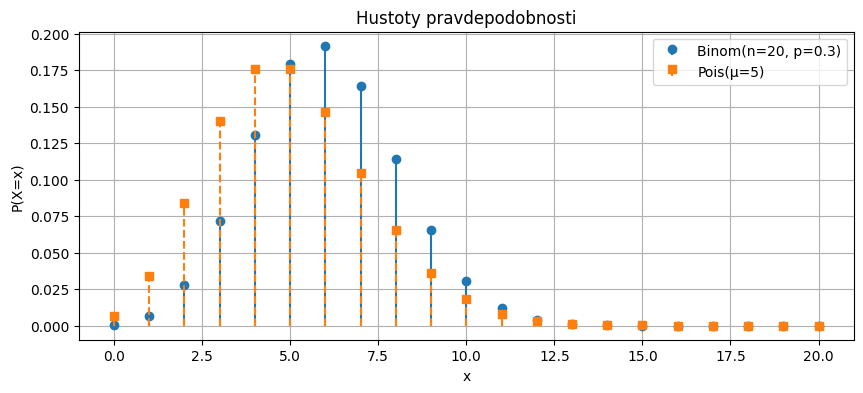

FSD TEST: Žiadna jednoznačná FSD dominancia.


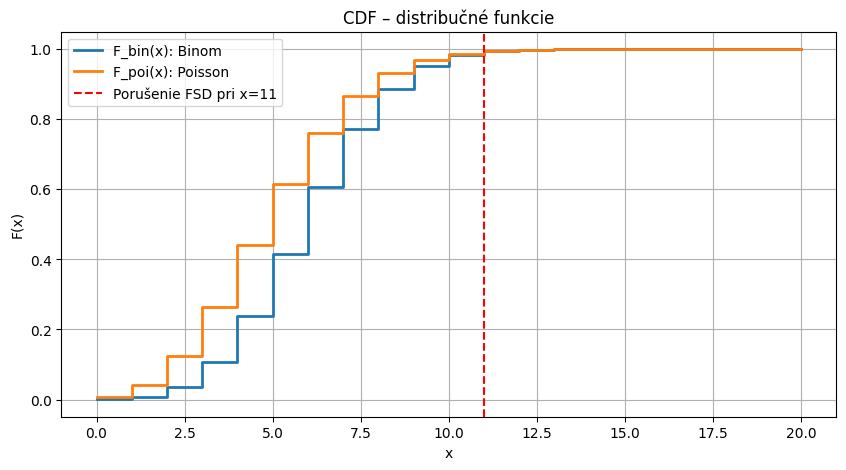

FSD kvantilovo: Žiadna FSD dominancia.


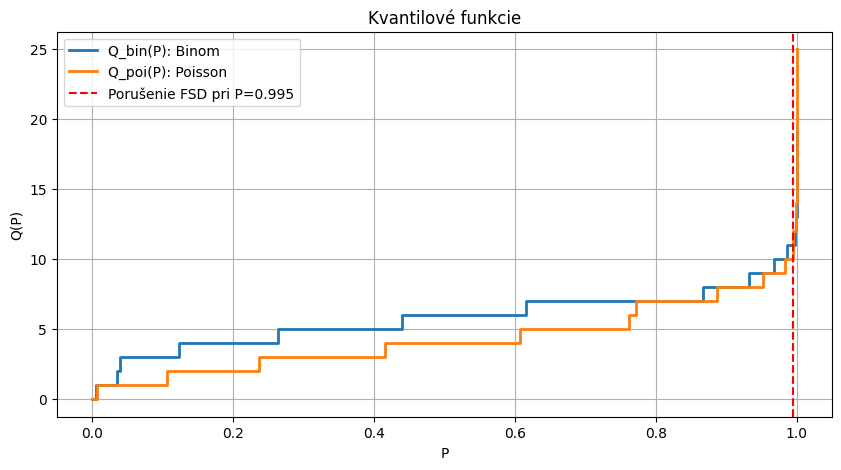

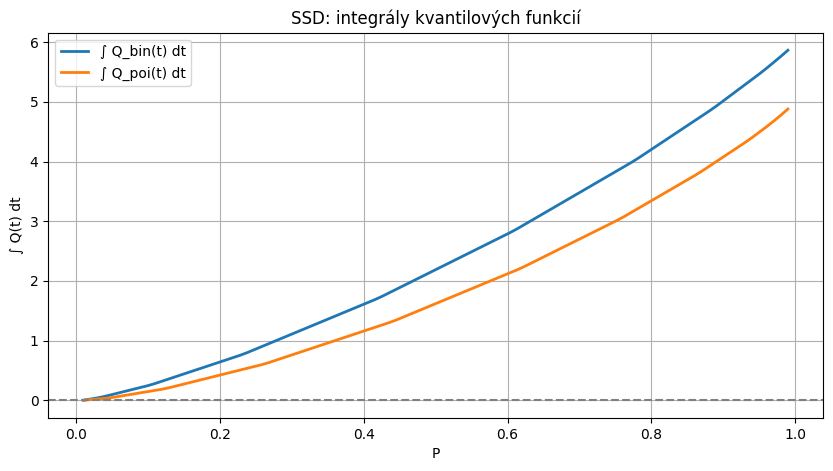

SSD TEST: Pois > Binomické.


In [47]:
# ----------------------------
# Parametre rozdelení
# ----------------------------
n, p = 20, 0.3
mu = 5

# Podporné body x
x = np.arange(0, max(n, mu*3) + 1)

# Hustoty pravdepodobností
pmf_bin = binom.pmf(x, n, p)
pmf_poi = poisson.pmf(x, mu)

# Distribučné funkcie
F_bin = binom.cdf(x, n, p)
F_poi = poisson.cdf(x, mu)

# Diskrétne P pre kvantilový test
P_all = np.unique(np.concatenate([F_bin, F_poi]))
P_all = P_all[(P_all > 0) & (P_all < 1)]

# Kvantilové funkcie na diskrétnych úrovniach P
Q_bin_all = binom.ppf(P_all, n, p)
Q_poi_all = poisson.ppf(P_all, mu)

# Rovnomerná mriežka pre SSD
P = np.linspace(0.01, 0.99, 100)
Q_bin = binom.ppf(P, n, p)
Q_poi = poisson.ppf(P, mu)

# 1) Hustoty
plt.figure(figsize=(10,4))
plt.stem(x, pmf_bin, linefmt='C0-', markerfmt='C0o', basefmt=' ', label=f'Binom(n={n}, p={p})')
plt.stem(x, pmf_poi, linefmt='C1--', markerfmt='C1s', basefmt=' ', label=f'Pois(μ={mu})')
plt.title('Hustoty pravdepodobnosti')
plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.legend()
plt.grid(True)
plt.show()

# 2) CDF + FSD test
plt.figure(figsize=(10,5))
plt.step(x, F_bin, where='post', label='F_bin(x): Binom', lw=2)
plt.step(x, F_poi, where='post', label='F_poi(x): Poisson', lw=2)
plt.title('CDF – distribučné funkcie')
plt.xlabel('x'); plt.ylabel('F(x)')
plt.grid(True)

diff_bin_poi = F_bin - F_poi
diff_poi_bin = F_poi - F_bin

if np.all(diff_bin_poi <= 0):
    print("FSD TEST: Binomické > Pois (F_bin ≤ F_poi ∀ x).")
elif np.all(diff_poi_bin <= 0):
    print("FSD TEST: Pois > Binomické (F_poi ≤ F_bin ∀ x).")
else:
    print("FSD TEST: Žiadna jednoznačná FSD dominancia.")
    viol = np.where(diff_bin_poi > 0)[0]
    if viol.size > 0 and x[viol[0]] != 0:
        xv = x[viol[0]]
        plt.axvline(xv, color='red', linestyle='--', label=f'Porušenie FSD pri x={xv}')
plt.legend(); plt.show()

# 3) Kvantilové funkcie + FSD test
plt.figure(figsize=(10,5))
plt.step(P_all, Q_bin_all, where='post', label='Q_bin(P): Binom', lw=2)
plt.step(P_all, Q_poi_all, where='post', label='Q_poi(P): Poisson', lw=2)
plt.title('Kvantilové funkcie')
plt.xlabel('P'); plt.ylabel('Q(P)')
plt.grid(True)

diff_q = Q_bin_all - Q_poi_all
if np.all(diff_q >= 0):
    print("FSD kvantilovo: Binomické > Pois (Q_bin ≥ Q_poi ).")
elif np.all(diff_q <= 0):
    print("FSD kvantilovo: Pois > Binomické (Q_poi ≥ Q_bin ).")
else:
    print("FSD kvantilovo: Žiadna FSD dominancia.")
    viol_q = np.where(diff_q < 0)[0]
    if viol_q.size > 0:
        Pv = P_all[viol_q[0]]
        plt.axvline(Pv, color='red', linestyle='--', label=f'Porušenie FSD pri P={Pv:.3f}')
plt.legend(); plt.show()

# 4) SSD: integrály kvantilových funkcií
int_bin = np.array([np.trapezoid(Q_bin[:i+1], P[:i+1]) for i in range(len(P))])
int_poi = np.array([np.trapezoid(Q_poi[:i+1], P[:i+1]) for i in range(len(P))])

plt.figure(figsize=(10,5))
plt.plot(P, int_bin, label='∫ Q_bin(t) dt', lw=2)
plt.plot(P, int_poi, label='∫ Q_poi(t) dt', lw=2)
plt.axhline(0, color='grey', linestyle='--')
plt.title('SSD: integrály kvantilových funkcií')
plt.xlabel('P'); plt.ylabel('∫ Q(t) dt')
plt.grid(True); plt.legend(); plt.show()

diff_int = int_bin - int_poi
if np.all(diff_int <= 0):
    print("SSD TEST: Binomické > Pois.")
elif np.all(diff_int >= 0):
    print("SSD TEST: Pois > Binomické.")
else:
    print("SSD TEST: Žiadna SSD dominancia.")


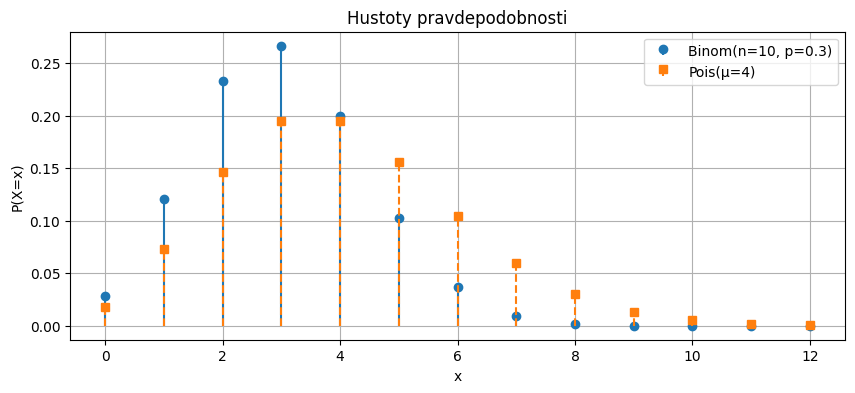

FSD TEST: Pois > Binomické (F_poi ≤ F_bin ∀ x).


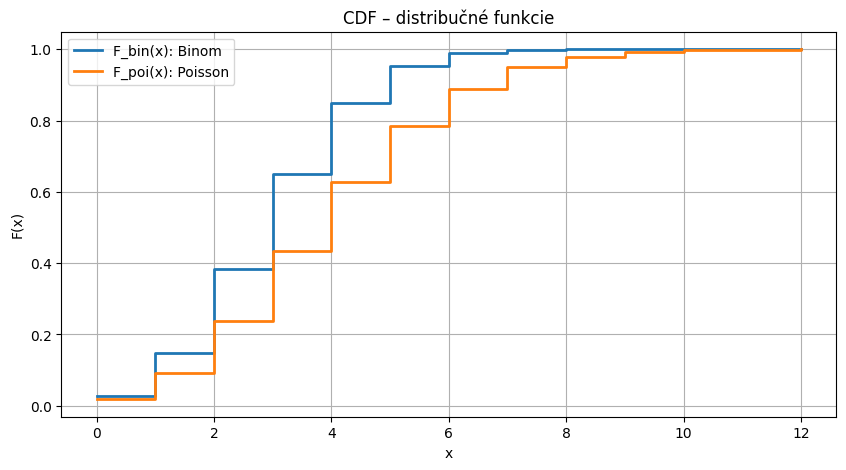

FSD kvantilovo: Pois > Binomické (Q_poi ≥ Q_bin ).


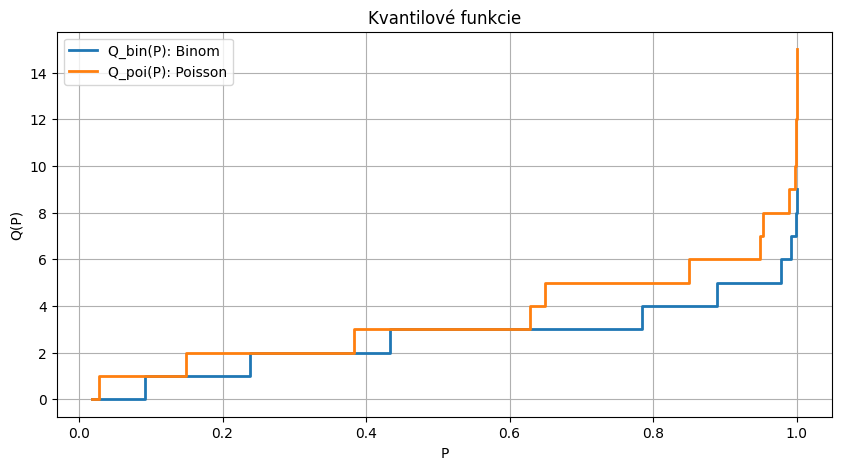

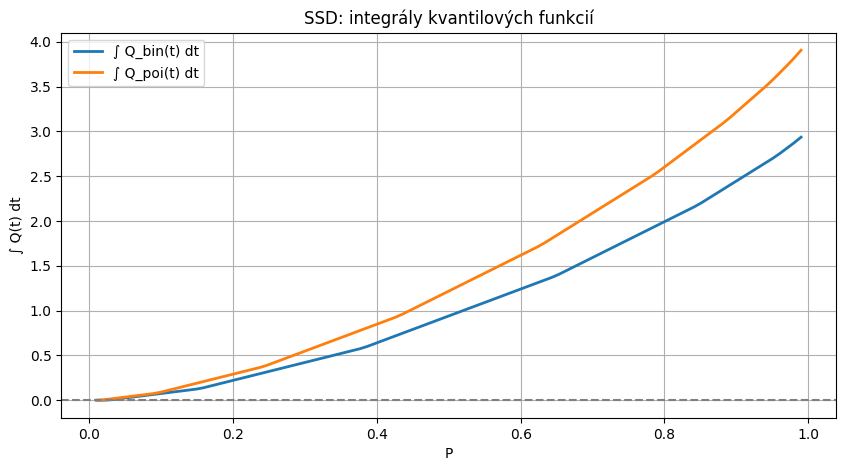

SSD TEST: Binomické > Pois.


In [49]:
# ----------------------------
# Parametre rozdelení
# ----------------------------
n, p = 10, 0.3
mu = 4

# Podporné body x
x = np.arange(0, max(n, mu*3) + 1)

# Hustoty pravdepodobností
pmf_bin = binom.pmf(x, n, p)
pmf_poi = poisson.pmf(x, mu)

# Distribučné funkcie
F_bin = binom.cdf(x, n, p)
F_poi = poisson.cdf(x, mu)

# Diskrétne P pre kvantilový test
P_all = np.unique(np.concatenate([F_bin, F_poi]))
P_all = P_all[(P_all > 0) & (P_all < 1)]

# Kvantilové funkcie na diskrétnych úrovniach P
Q_bin_all = binom.ppf(P_all, n, p)
Q_poi_all = poisson.ppf(P_all, mu)

# Rovnomerná mriežka pre SSD
P = np.linspace(0.01, 0.99, 100)
Q_bin = binom.ppf(P, n, p)
Q_poi = poisson.ppf(P, mu)

# 1) Hustoty
plt.figure(figsize=(10,4))
plt.stem(x, pmf_bin, linefmt='C0-', markerfmt='C0o', basefmt=' ', label=f'Binom(n={n}, p={p})')
plt.stem(x, pmf_poi, linefmt='C1--', markerfmt='C1s', basefmt=' ', label=f'Pois(μ={mu})')
plt.title('Hustoty pravdepodobnosti')
plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.legend()
plt.grid(True)
plt.show()

# 2) CDF + FSD test
plt.figure(figsize=(10,5))
plt.step(x, F_bin, where='post', label='F_bin(x): Binom', lw=2)
plt.step(x, F_poi, where='post', label='F_poi(x): Poisson', lw=2)
plt.title('CDF – distribučné funkcie')
plt.xlabel('x'); plt.ylabel('F(x)')
plt.grid(True)

diff_bin_poi = F_bin - F_poi
diff_poi_bin = F_poi - F_bin

if np.all(diff_bin_poi <= 0):
    print("FSD TEST: Binomické > Pois (F_bin ≤ F_poi ∀ x).")
elif np.all(diff_poi_bin <= 0):
    print("FSD TEST: Pois > Binomické (F_poi ≤ F_bin ∀ x).")
else:
    print("FSD TEST: Žiadna jednoznačná FSD dominancia.")
    viol = np.where(diff_bin_poi > 0)[0]
    if viol.size > 0 and x[viol[0]] != 0:
        xv = x[viol[0]]
        plt.axvline(xv, color='red', linestyle='--', label=f'Porušenie FSD pri x={xv}')
plt.legend(); plt.show()

# 3) Kvantilové funkcie + FSD test
plt.figure(figsize=(10,5))
plt.step(P_all, Q_bin_all, where='post', label='Q_bin(P): Binom', lw=2)
plt.step(P_all, Q_poi_all, where='post', label='Q_poi(P): Poisson', lw=2)
plt.title('Kvantilové funkcie')
plt.xlabel('P'); plt.ylabel('Q(P)')
plt.grid(True)

diff_q = Q_bin_all - Q_poi_all
if np.all(diff_q >= 0):
    print("FSD kvantilovo: Binomické > Pois (Q_bin ≥ Q_poi ).")
elif np.all(diff_q <= 0):
    print("FSD kvantilovo: Pois > Binomické (Q_poi ≥ Q_bin ).")
else:
    print("FSD kvantilovo: Žiadna FSD dominancia.")
    viol_q = np.where(diff_q < 0)[0]
    if viol_q.size > 0:
        Pv = P_all[viol_q[0]]
        plt.axvline(Pv, color='red', linestyle='--', label=f'Porušenie FSD pri P={Pv:.3f}')
plt.legend(); plt.show()

# 4) SSD: integrály kvantilových funkcií
int_bin = np.array([np.trapezoid(Q_bin[:i+1], P[:i+1]) for i in range(len(P))])
int_poi = np.array([np.trapezoid(Q_poi[:i+1], P[:i+1]) for i in range(len(P))])

plt.figure(figsize=(10,5))
plt.plot(P, int_bin, label='∫ Q_bin(t) dt', lw=2)
plt.plot(P, int_poi, label='∫ Q_poi(t) dt', lw=2)
plt.axhline(0, color='grey', linestyle='--')
plt.title('SSD: integrály kvantilových funkcií')
plt.xlabel('P'); plt.ylabel('∫ Q(t) dt')
plt.grid(True); plt.legend(); plt.show()

diff_int = int_bin - int_poi
if np.all(diff_int <= 0):
    print("SSD TEST: Binomické > Pois.")
elif np.all(diff_int >= 0):
    print("SSD TEST: Pois > Binomické.")
else:
    print("SSD TEST: Žiadna SSD dominancia.")
